# 课时38 tf.keras序列问题_电影评论数据分类

In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('darkgrid')
# pathlib相比os.path更好用
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.0.0


# 1. 导入电影评论数据

In [22]:
# 导入IMDB电影评论数据，由于数据集中的词典非常庞大，所以这个规定num_words=10000，也就是考虑前10000个单词，超过这个数目的单词就不再考虑了
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
x_train.shape, y_train.shape

((25000,), (25000,))

In [23]:
# 这里将文本训练成密集向量(先将每条文本填充到固定长度)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, 300)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, 300)

# 2. 建立模型

In [9]:
model = tf.keras.Sequential([
    # 将数据集映射成密集向量
    tf.keras.layers.Embedding(input_dim=10000, output_dim=50, input_length=300),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1920128   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,420,257
Trainable params: 2,420,257
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_test, y_train))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 7s 293us/sample - loss: 8.2723e-06 - acc: 1.0000 - val_loss: 6.6618 - val_acc: 0.4989
Epoch 2/5
25000/25000 [==============================] - 7s 287us/sample - loss: 1.1275e-06 - acc: 1.0000 - val_loss: 7.0420 - val_acc: 0.4986
Epoch 3/5
25000/25000 [==============================] - 7s 289us/sample - loss: 5.0581e-07 - acc: 1.0000 - val_loss: 7.2730 - val_acc: 0.4982
Epoch 4/5
25000/25000 [==============================] - 7s 292us/sample - loss: 3.2612e-07 - acc: 1.0000 - val_loss: 7.4496 - val_acc: 0.4985
Epoch 5/5
25000/25000 [==============================] - 7s 292us/sample - loss: 2.3186e-07 - acc: 1.0000 - val_loss: 7.5947 - val_acc: 0.4984


In [14]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

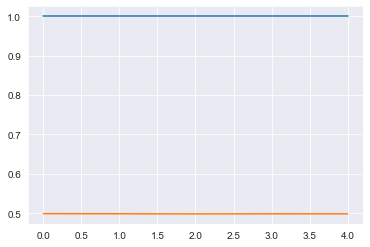

In [15]:
plt.plot(history.epoch, history.history.get('acc'), label='train_acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')

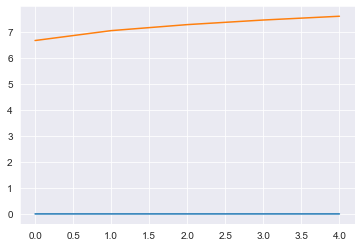

In [16]:
plt.plot(history.epoch, history.history.get('loss'), label='train_loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')

# 3. 解决模型过拟合问题

In [24]:
model = tf.keras.Sequential([
    # 将数据集映射成密集向量
    tf.keras.layers.Embedding(input_dim=10000, output_dim=50, input_length=300),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1920128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 2,420,257
Trainable params: 2,420,257
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_test, y_train))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 323us/sample - loss: 0.5350 - acc: 0.7060 - val_loss: 1.3844 - val_acc: 0.4961
Epoch 2/5
25000/25000 [==============================] - 8s 308us/sample - loss: 0.1900 - acc: 0.9290 - val_loss: 1.7653 - val_acc: 0.4970
Epoch 3/5
25000/25000 [==============================] - 8s 308us/sample - loss: 0.0553 - acc: 0.9872 - val_loss: 2.4426 - val_acc: 0.4983
Epoch 4/5
25000/25000 [==============================] - 8s 305us/sample - loss: 0.0137 - acc: 0.9987 - val_loss: 2.9205 - val_acc: 0.4988
Epoch 5/5
25000/25000 [==============================] - 8s 306us/sample - loss: 0.0044 - acc: 0.9999 - val_loss: 3.3753 - val_acc: 0.4985
